In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)

In [5]:
from datetime import datetime

In [6]:
economy_df=pd.read_csv('economy.csv')
business_df=pd.read_csv('business.csv')

In [7]:
economy_df['class']='Economy'
business_df['class']='Business'

In [8]:
business_df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",Business
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",Business
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",Business
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",Business


In [9]:
combined_df=pd.concat([ economy_df,business_df],ignore_index =True)

In [10]:
combined_df['flight']=combined_df ['ch_code'] + '-' + combined_df['num_code'].astype(str)
combined_df = combined_df.rename(columns ={
    'from':'source_city',
    'to':'destination_city',
    'dep_time':'departure_time',
    'arr_time':'arrival_time',
})

In [11]:
def categorize_stops (stops):
    if stops.startswith('n'):
        return 'zero'
    elif stops.startswith('1-'):
        return 'one_or_more'
    else :
        return 'two_or_more'
    
combined_df ['stops'] = combined_df['stop'].apply(categorize_stops)

In [12]:
def categorize_time ( time_str ):
    hour = pd.to_datetime (time_str,format ='%H:%M').hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else :
        return 'Night'

In [13]:
combined_df ['departure_time'] = combined_df['departure_time'].apply(categorize_time)

In [14]:
combined_df['arrival_time']=combined_df['arrival_time'].apply(categorize_time)

In [15]:
combined_df['price']=combined_df ['price'].str.replace (',','').astype(int)

In [16]:
def duration_to_hours(duration_str): 
    parts=duration_str.split(' ')
    try:
        hours=float(parts[0].replace('h',''))
        minutes=float(parts[1].replace('m',''))if len (parts)>1 else 0
    except ValueError:
        return 0
    return hours+minutes/60

In [17]:
from datetime import date
def getDays(given_date):
    given_date = given_date.split("-")
    day = int(given_date[0])
    month = int(given_date[1])
    year = int(given_date[2])
    date1= date(year,month,day)
    date2 = date(2022,2,10) #This date is considered according to the given datasets
    difference = date1-date2
    return difference.days


In [18]:
combined_df['duration']=combined_df['time_taken'].apply(duration_to_hours)

In [19]:
combined_df['days_left']=combined_df['date'].apply(getDays)

In [20]:
combined_df

,date,airline,ch_code,num_code,departure_time,source_city,time_taken,stop,arrival_time,destination_city,price,class,flight,stops,duration,days_left
0,11-02-2022,SpiceJet,SG,8709,Evening,Delhi,02h 10m,non-stop,Night,Mumbai,5953,Economy,SG-8709,zero,2.166667,1
1,11-02-2022,SpiceJet,SG,8157,Morning,Delhi,02h 20m,non-stop,Morning,Mumbai,5953,Economy,SG-8157,zero,2.333333,1
2,11-02-2022,AirAsia,I5,764,Night,Delhi,02h 10m,non-stop,Morning,Mumbai,5956,Economy,I5-764,zero,2.166667,1
3,11-02-2022,Vistara,UK,995,Morning,Delhi,02h 15m,non-stop,Afternoon,Mumbai,5955,Economy,UK-995,zero,2.250000,1
4,11-02-2022,Vistara,UK,963,Morning,Delhi,02h 20m,non-stop,Morning,Mumbai,5955,Economy,UK-963,zero,2.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,822,Morning,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Evening,Hyderabad,69265,Business,UK-822,one_or_more,10.083333,49
300257,31-03-2022,Vistara,UK,826,Afternoon,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Night,Hyderabad,77105,Business,UK-826,one_or_more,10.416667,49
300258,31-03-2022,Vistara,UK,832,Morning,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Evening,Hyderabad,79099,Business,UK-832,one_or_more,13.833333,49
300259,31-03-2022,Vistara,UK,828,Morning,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Evening,Hyderabad,81585,Business,UK-828,one_or_more,10.000000,49


In [21]:
clean_df=combined_df[['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left','price']]

In [22]:
clean_df.to_csv('clean_dt.csv',index=False)

In [23]:
df2= pd.read_csv('clean_dt.csv')
df2

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.166667,1,5953
1,SpiceJet,SG-8157,Delhi,Morning,zero,Morning,Mumbai,Economy,2.333333,1,5953
2,AirAsia,I5-764,Delhi,Night,zero,Morning,Mumbai,Economy,2.166667,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.250000,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.333333,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK-822,Chennai,Morning,one_or_more,Evening,Hyderabad,Business,10.083333,49,69265
300257,Vistara,UK-826,Chennai,Afternoon,one_or_more,Night,Hyderabad,Business,10.416667,49,77105
300258,Vistara,UK-832,Chennai,Morning,one_or_more,Evening,Hyderabad,Business,13.833333,49,79099
300259,Vistara,UK-828,Chennai,Morning,one_or_more,Evening,Hyderabad,Business,10.000000,49,81585


In [24]:
df2 = df2.drop(["flight"],axis=1)
df2

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.166667,1,5953
1,SpiceJet,Delhi,Morning,zero,Morning,Mumbai,Economy,2.333333,1,5953
2,AirAsia,Delhi,Night,zero,Morning,Mumbai,Economy,2.166667,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.250000,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.333333,1,5955
...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,Chennai,Morning,one_or_more,Evening,Hyderabad,Business,10.083333,49,69265
300257,Vistara,Chennai,Afternoon,one_or_more,Night,Hyderabad,Business,10.416667,49,77105
300258,Vistara,Chennai,Morning,one_or_more,Evening,Hyderabad,Business,13.833333,49,79099
300259,Vistara,Chennai,Morning,one_or_more,Evening,Hyderabad,Business,10.000000,49,81585


C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

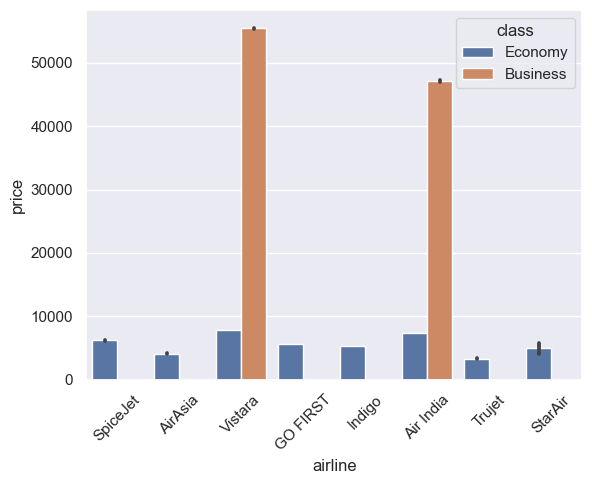

In [25]:
sns.barplot(data=df2, x="airline", y="price", hue="class")
plt.xticks(rotation=45)
plt.show()

C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

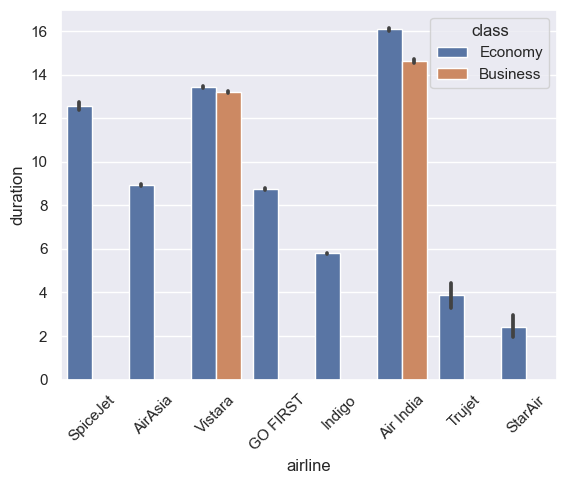

In [26]:
sns.barplot(data=df2, x="airline", y="duration", hue="class")
plt.xticks(rotation=45)
plt.show()

C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='stops', ylabel='price'>

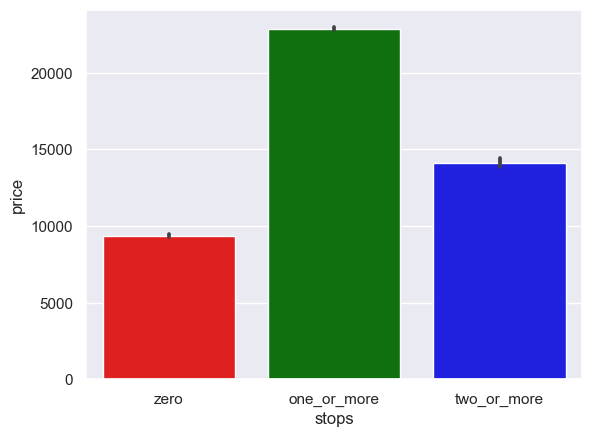

In [27]:
sns.barplot(data=df2, x="stops", y="price", palette=['red','green','blue'])

C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='stops', ylabel='count'>

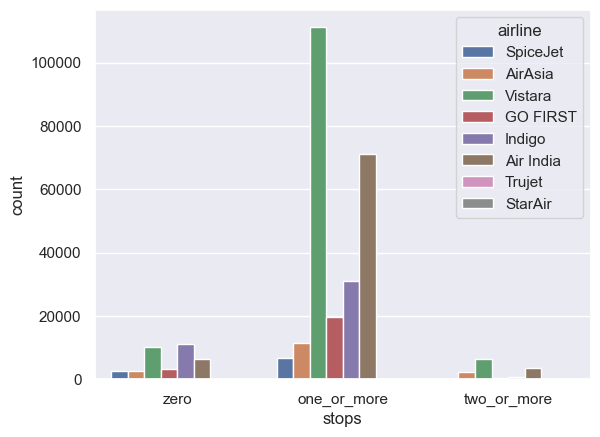

In [28]:
sns.countplot(data=df2, x="stops", hue="airline")

C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sjkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='destination_city', ylabel='price'>

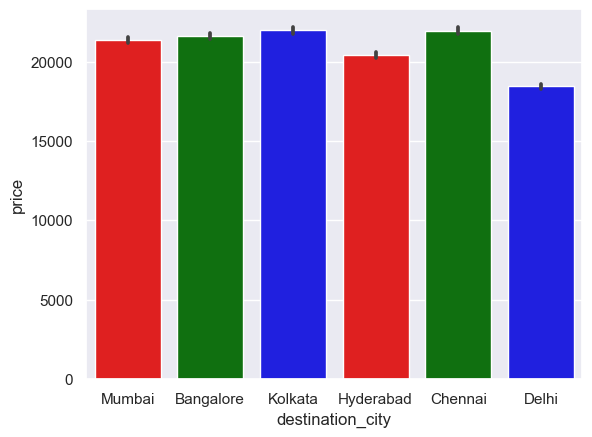

In [29]:
sns.barplot(data=df2, x="destination_city", y="price", palette=['red','green','blue'])

In [30]:
df2['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [31]:
df2['departure_time'].unique()

array(['Evening', 'Morning', 'Night', 'Afternoon'], dtype=object)

In [32]:
df2['arrival_time'].unique()

array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

In [33]:
df2['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [34]:
#Change value in airline column
df2['airline'] = df2['airline'].replace(['SpiceJet'],'0')
df2['airline'] = df2['airline'].replace(['AirAsia'],'1')
df2['airline'] = df2['airline'].replace(['Vistara'],'2')
df2['airline'] = df2['airline'].replace(['GO_FIRST'],'3')
df2['airline'] = df2['airline'].replace(['GO FIRST'],'3')
df2['airline'] = df2['airline'].replace(['Indigo'],'4')
df2['airline'] = df2['airline'].replace(['Air_India'],'5')
df2['airline'] = df2['airline'].replace(['Air India'],'5')
df2['airline'] = df2['airline'].replace(['Trujet'],'6')
df2['airline'] = df2['airline'].replace(['StarAir'],'7')
#Change value in source_city column
df2['source_city'] = df2['source_city'].replace(['Delhi'],'0')
df2['source_city'] = df2['source_city'].replace(['Mumbai'],'1')
df2['source_city'] = df2['source_city'].replace(['Bangalore'],'2')
df2['source_city'] = df2['source_city'].replace(['Kolkata'],'3')
df2['source_city'] = df2['source_city'].replace(['Hyderabad'],'4')
df2['source_city'] = df2['source_city'].replace(['Chennai'],'5')
#Change value in departure_time column
df2['departure_time'] = df2['departure_time'].replace(['Evening'],'0')
df2['departure_time'] = df2['departure_time'].replace(['Early_Morning'],'1')
df2['departure_time'] = df2['departure_time'].replace(['Morning'],'2')
df2['departure_time'] = df2['departure_time'].replace(['Afternoon'],'3')
df2['departure_time'] = df2['departure_time'].replace(['Night'],'4')
df2['departure_time'] = df2['departure_time'].replace(['Late_Night'],'5')
#Change value in stops column
df2['stops'] = df2['stops'].replace(['zero'],'0')
df2['stops'] = df2['stops'].replace(['one'],'1')
df2['stops'] = df2['stops'].replace(['two_or_more'],'3')
df2['stops'] = df2['stops'].replace(['one_or_more'],'2')
#Change value in arrival_time column
df2['arrival_time'] = df2['arrival_time'].replace(['Evening'],'0')
df2['arrival_time'] = df2['arrival_time'].replace(['Early_Morning'],'1')
df2['arrival_time'] = df2['arrival_time'].replace(['Morning'],'2')
df2['arrival_time'] = df2['arrival_time'].replace(['Afternoon'],'3')
df2['arrival_time'] = df2['arrival_time'].replace(['Night'],'4')
df2['arrival_time'] = df2['arrival_time'].replace(['Late_Night'],'5')
#Change value in destination_city column
df2['destination_city'] = df2['destination_city'].replace(['Delhi'],'0')
df2['destination_city'] = df2['destination_city'].replace(['Mumbai'],'1')
df2['destination_city'] = df2['destination_city'].replace(['Bangalore'],'2')
df2['destination_city'] = df2['destination_city'].replace(['Kolkata'],'3')
df2['destination_city'] = df2['destination_city'].replace(['Hyderabad'],'4')
df2['destination_city'] = df2['destination_city'].replace(['Chennai'],'5')
#Change value in class column
df2['class'] = df2['class'].replace(['Economy'],'0')
df2['class'] = df2['class'].replace(['Business'],'1')
df2.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,0,0,0,4,1,0,2.166667,1,5953
1,0,0,2,0,2,1,0,2.333333,1,5953
2,1,0,4,0,2,1,0,2.166667,1,5956
3,2,0,2,0,3,1,0,2.250000,1,5955
4,2,0,2,0,2,1,0,2.333333,1,5955


In [35]:
df2.dtypes

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [36]:
df2['airline'] = pd.to_numeric(df2['airline'])
df2['source_city'] = pd.to_numeric(df2['source_city'])
df2['departure_time'] = pd.to_numeric(df2['departure_time'])
df2['stops'] = pd.to_numeric(df2['stops'])
df2['arrival_time'] = pd.to_numeric(df2['arrival_time'])
df2['destination_city'] = pd.to_numeric(df2['destination_city'])
df2['class'] = pd.to_numeric(df2['class'])
df2.dtypes

airline               int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

<Axes: >

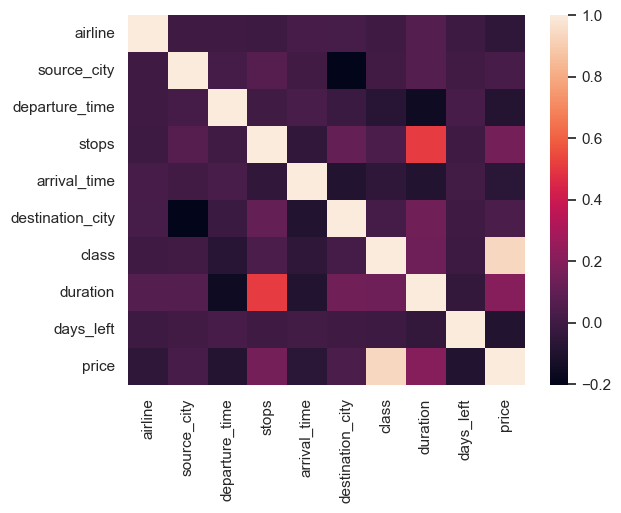

In [37]:
sns.heatmap(df2.corr(), fmt='.2g')

In [38]:
X = df2.drop('price', axis=1)
y = df2['price']

In [39]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [41]:
from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1115.8050709846455
MSE is 8003110.071129824
R2 score is 0.9845578648111901
RMSE score is 2828.976859419289


In [42]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [43]:
from sklearn import metrics
import math

y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print("MAE is {}".format(mae))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse))

MAE is 1200.72216486548
MSE is 12622931.279450834
R2 score is 0.9756438422608352
RMSE score is 3552.876479621946


In [44]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [45]:
from sklearn import metrics
import math

y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print("MAE is {}".format(mae))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("RMSE score is {}".format(rmse))

MAE is 3657.5233118636324
MSE is 34383097.06085027
R2 score is 0.9336572372109504
RMSE score is 5863.71017879041
